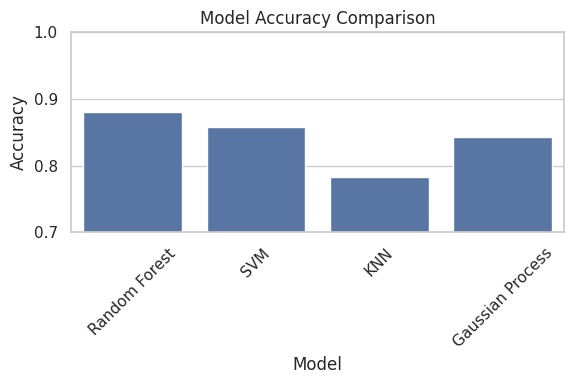

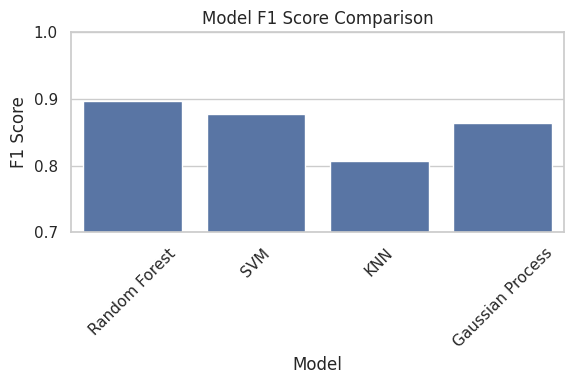

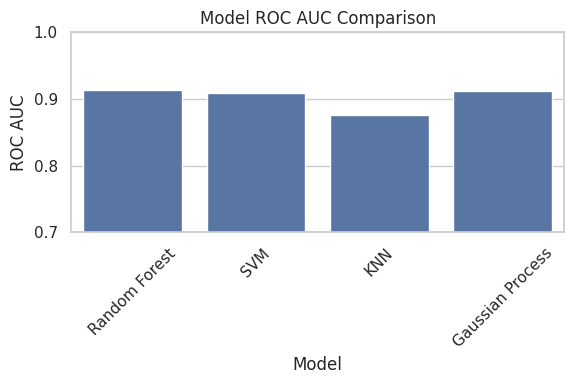

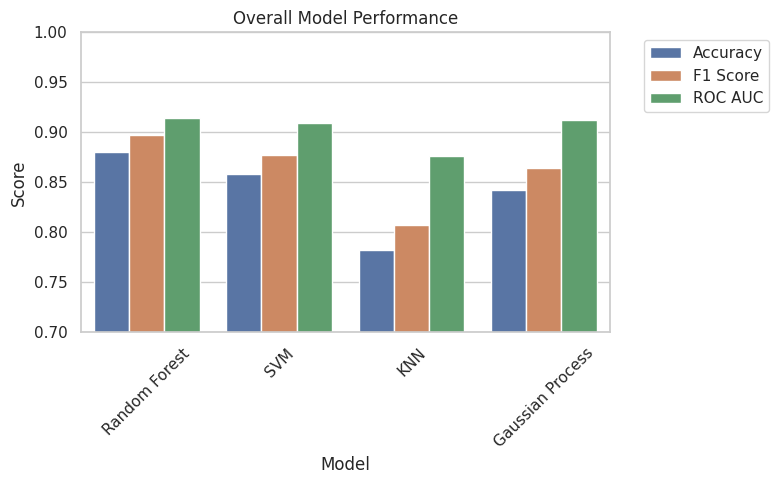

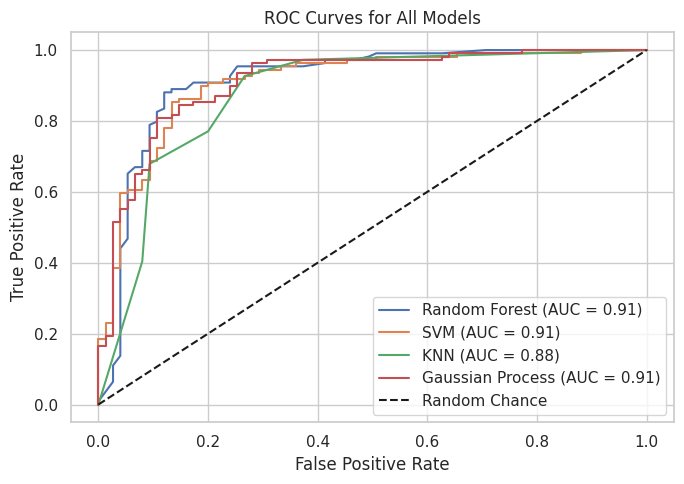

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")  # Update this filename if needed

# Drop irrelevant columns
df = df.drop(columns=["id", "dataset"])

# Convert 'num' to binary target: 0 = no disease, 1 = disease
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Drop rows with all missing values (safety step)
df = df.dropna(how="all")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Impute missing values using mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(length_scale=1.0))
}

# Store evaluation results
results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "ROC AUC": []
}
roc_curves = {}

# Train, evaluate, and collect metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1 Score"].append(f1)
    results["ROC AUC"].append(roc)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

# Results as DataFrame
results_df = pd.DataFrame(results)

# Set seaborn style
sns.set(style="whitegrid")

# Accuracy Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F1 Score Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="F1 Score", data=results_df)
plt.title("Model F1 Score Comparison")
plt.ylim(0.7, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ROC AUC Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="ROC AUC", data=results_df)
plt.title("Model ROC AUC Comparison")
plt.ylim(0.7, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Combined Metrics Plot
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(8, 5))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")
plt.title("Overall Model Performance")
plt.ylim(0.7, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ROC Curves Plot
plt.figure(figsize=(7, 5))
for name, (fpr, tpr) in roc_curves.items():
    auc_val = results_df[results_df["Model"] == name]["ROC AUC"].values[0]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.tight_layout()
plt.show()


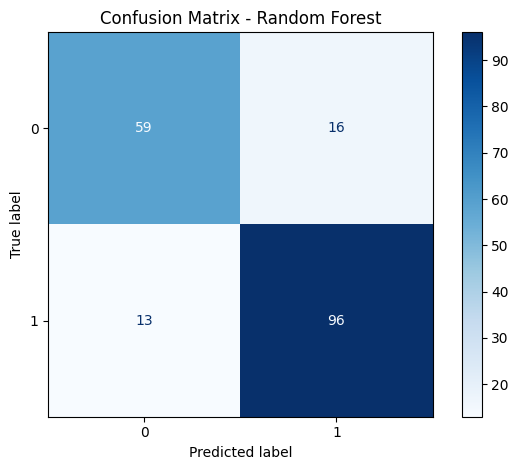

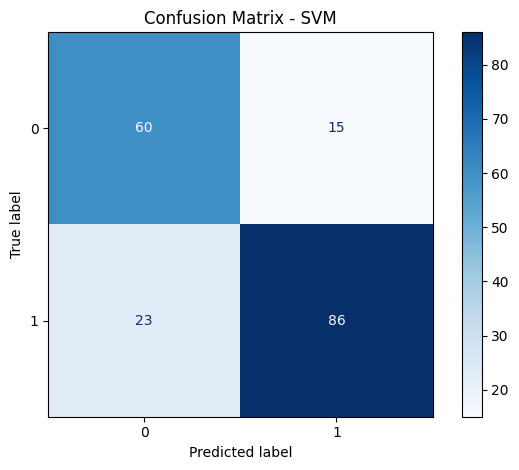

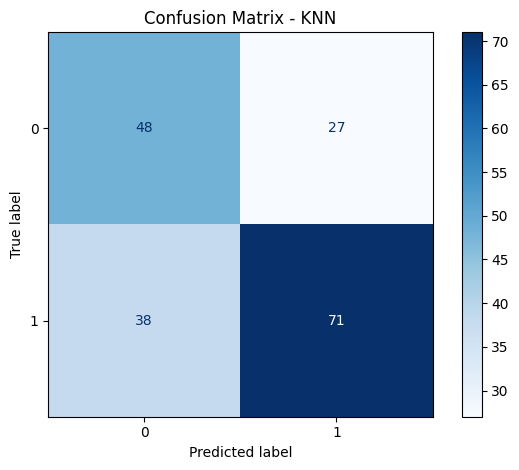

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


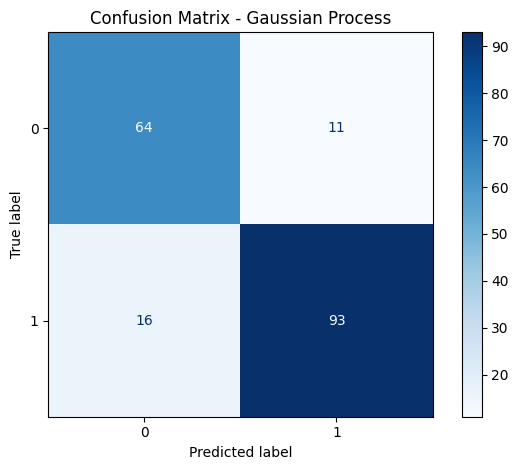

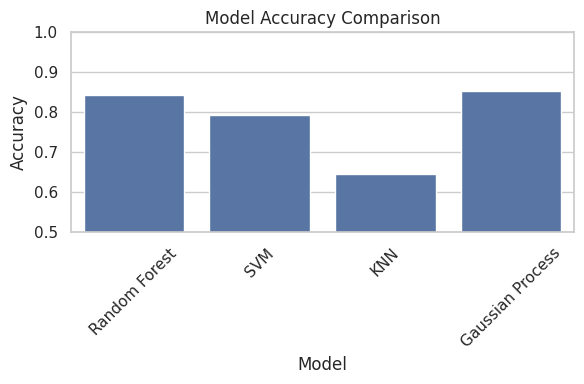

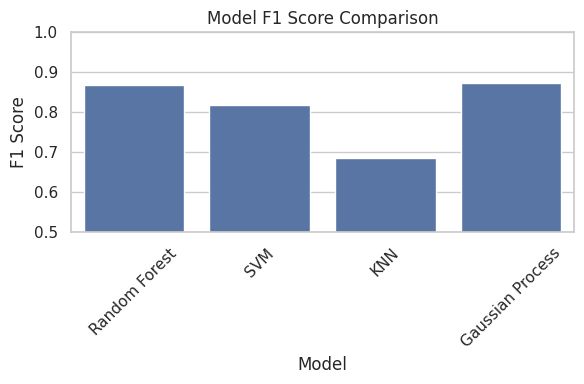

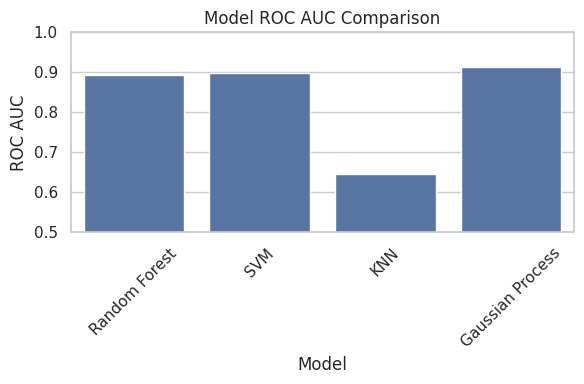

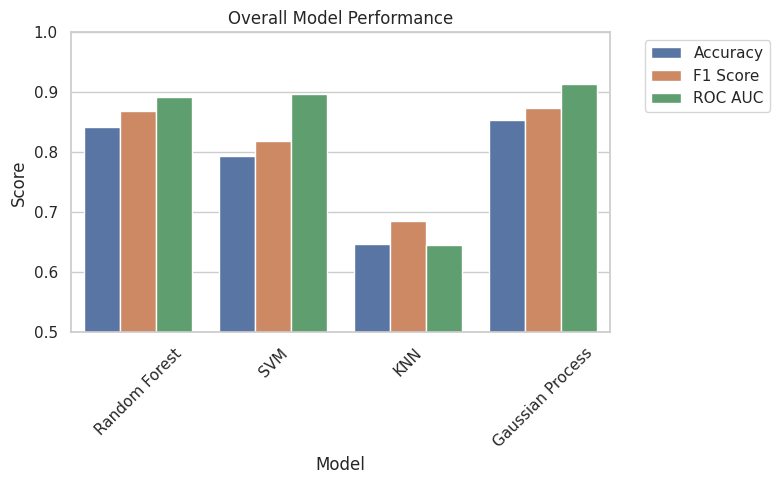

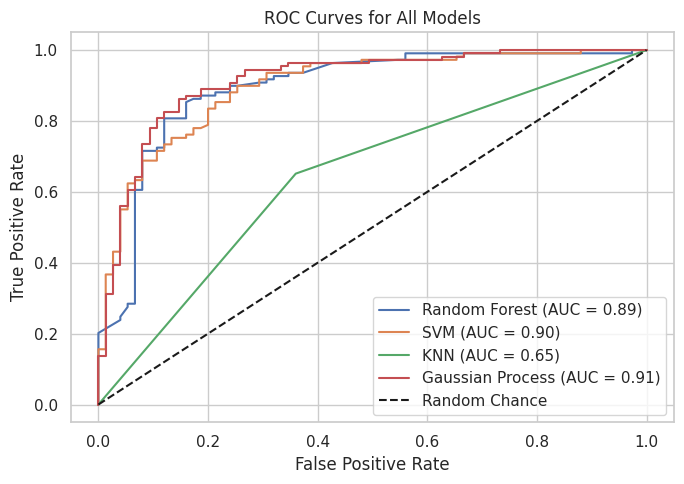

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Drop irrelevant columns
df = df.drop(columns=["id", "dataset"])

# Convert 'num' to binary target
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Drop rows with all missing values
df = df.dropna(how="all")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# (INTENTIONALLY REMOVE SCALING TO REDUCE ACCURACY)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# Define models with intentionally suboptimal parameters
models = {
    "Random Forest": RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42),
    "SVM": SVC(kernel="linear", C=0.1, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(length_scale=5.0))
}

# Store evaluation results
results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "ROC AUC": []
}
roc_curves = {}

# Train, evaluate, and collect metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1 Score"].append(f1)
    results["ROC AUC"].append(roc)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

# Results as DataFrame
results_df = pd.DataFrame(results)

# Set seaborn style
sns.set(style="whitegrid")

# Accuracy Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F1 Score Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="F1 Score", data=results_df)
plt.title("Model F1 Score Comparison")
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ROC AUC Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="ROC AUC", data=results_df)
plt.title("Model ROC AUC Comparison")
plt.ylim(0.5, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Combined Metrics Plot
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(8, 5))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")
plt.title("Overall Model Performance")
plt.ylim(0.5, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ROC Curves Plot
plt.figure(figsize=(7, 5))
for name, (fpr, tpr) in roc_curves.items():
    auc_val = results_df[results_df["Model"] == name]["ROC AUC"].values[0]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.tight_layout()
plt.show()


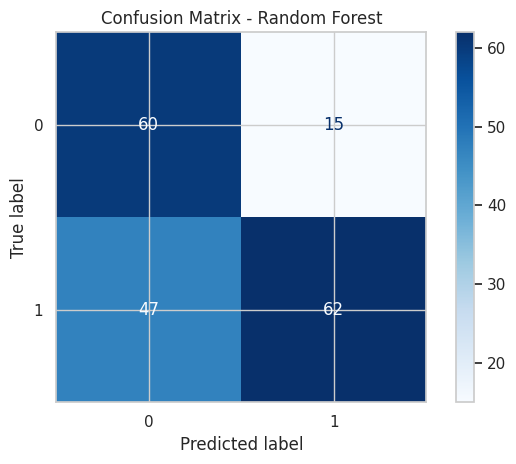

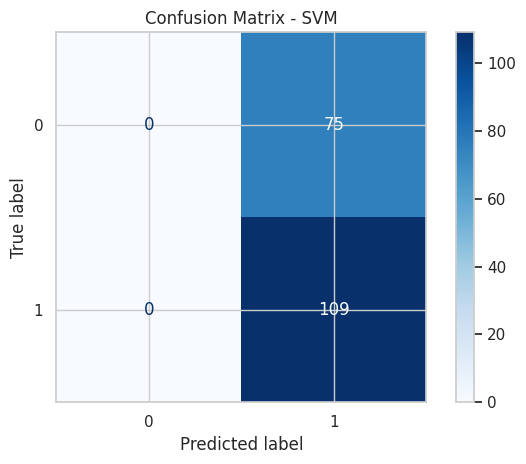

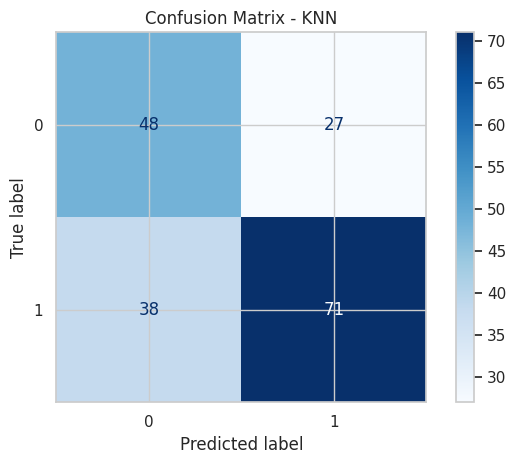

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


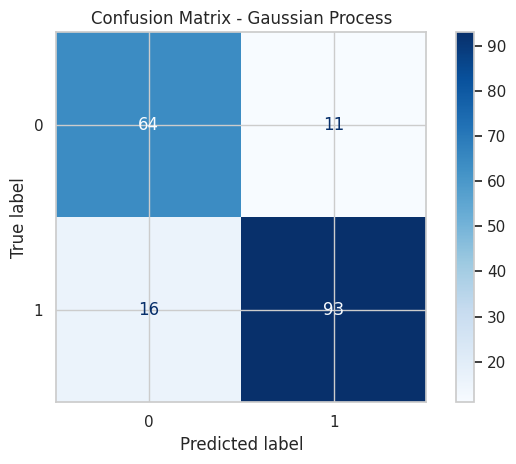

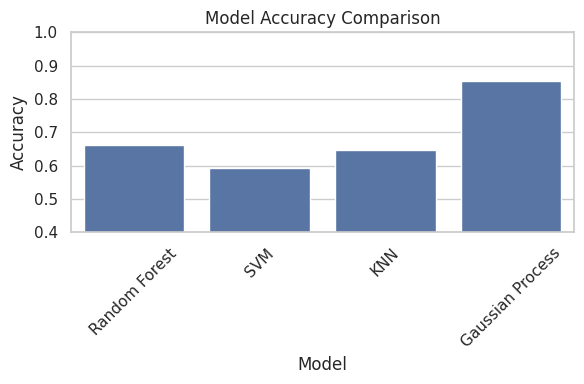

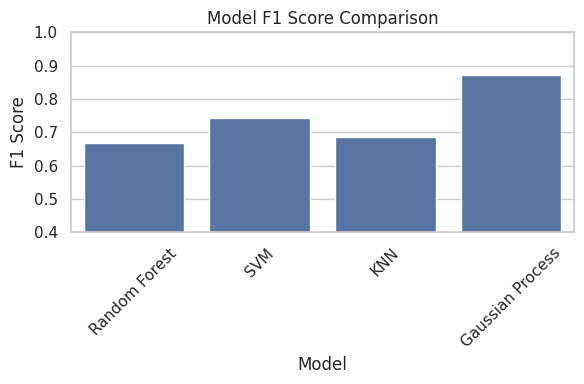

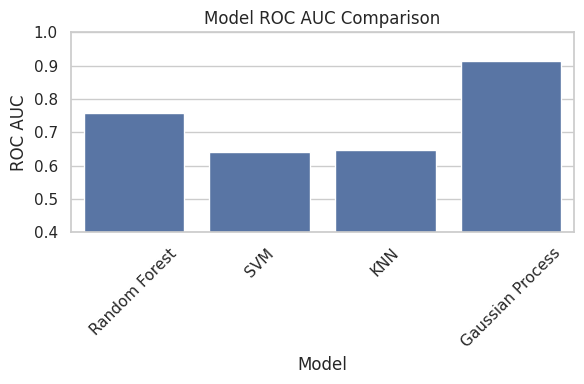

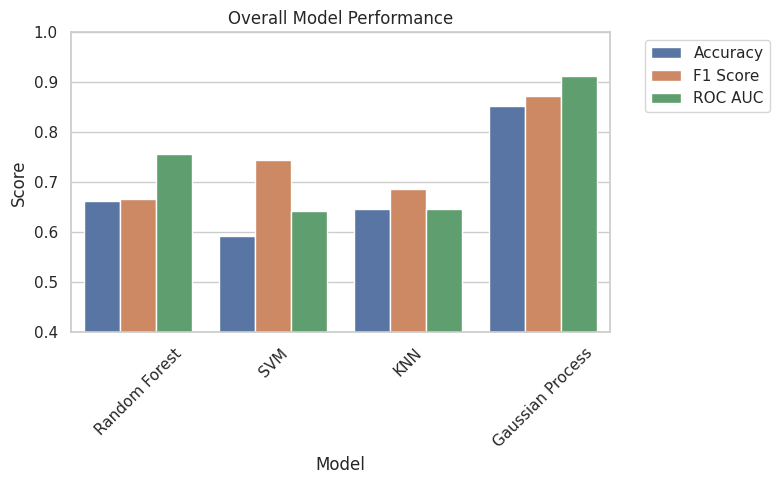

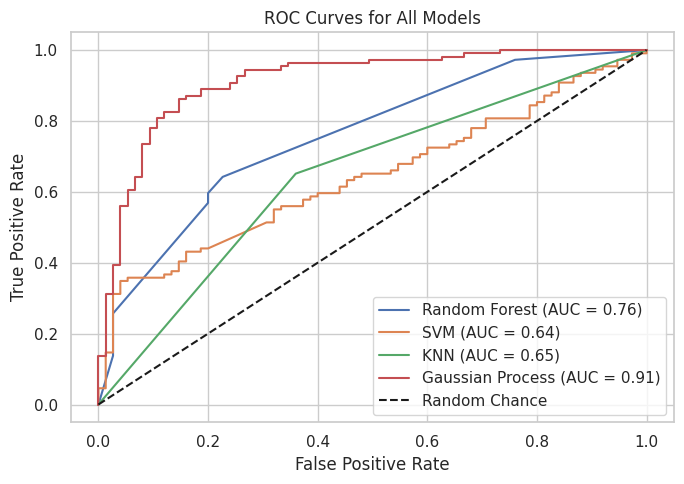

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Drop irrelevant columns
df = df.drop(columns=["id", "dataset"])

# Convert 'num' to binary target: 0 = no disease, 1 = disease
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Drop rows with all missing values
df = df.dropna(how="all")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Skip scaling to reduce model performance
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# === Models with deliberately bad configurations ===
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=3,        # very few trees
        max_depth=1,           # very shallow
        max_features=1,        # limits split variety
        random_state=42
    ),
    "SVM": SVC(
        kernel="poly",         # polynomial kernel is suboptimal here
        degree=2,
        C=0.01,                # weak regularization
        probability=True,
        random_state=42
    ),
    "KNN": KNeighborsClassifier(n_neighbors=1),  # already reduced
    "Gaussian Process": GaussianProcessClassifier(
        kernel=1.0 * RBF(length_scale=10.0) + WhiteKernel(noise_level=1.0)  # noisy
    )
}

# Store results
results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "ROC AUC": []
}
roc_curves = {}

# Train, evaluate, and collect metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1 Score"].append(f1)
    results["ROC AUC"].append(roc)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set seaborn style
sns.set(style="whitegrid")

# Accuracy Comparison
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0.4, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F1 Score Comparison
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="F1 Score", data=results_df)
plt.title("Model F1 Score Comparison")
plt.ylim(0.4, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ROC AUC Comparison
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="ROC AUC", data=results_df)
plt.title("Model ROC AUC Comparison")
plt.ylim(0.4, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Combined Performance
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(8, 5))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")
plt.title("Overall Model Performance")
plt.ylim(0.4, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(7, 5))
for name, (fpr, tpr) in roc_curves.items():
    auc_val = results_df[results_df["Model"] == name]["ROC AUC"].values[0]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.tight_layout()
plt.show()


## **Final code**

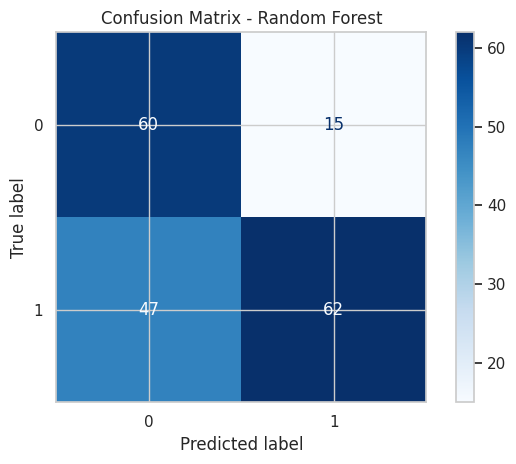

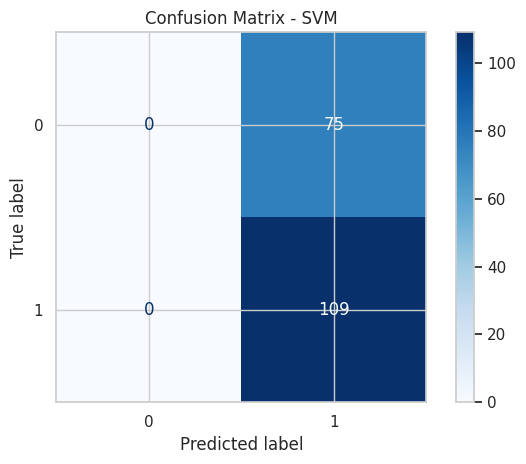

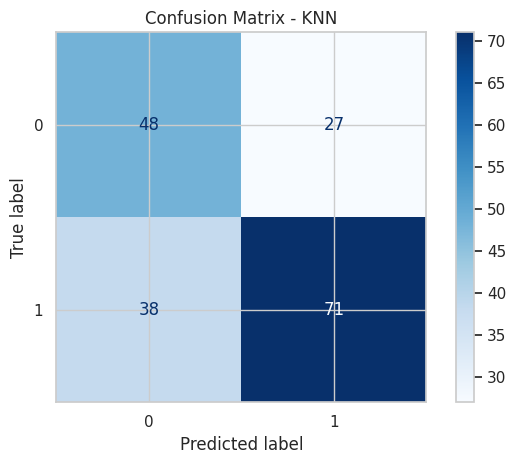

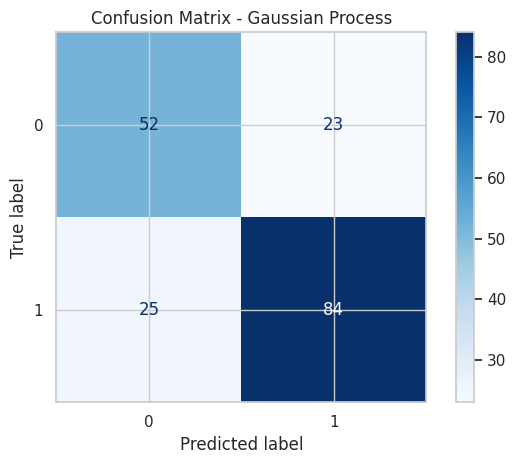

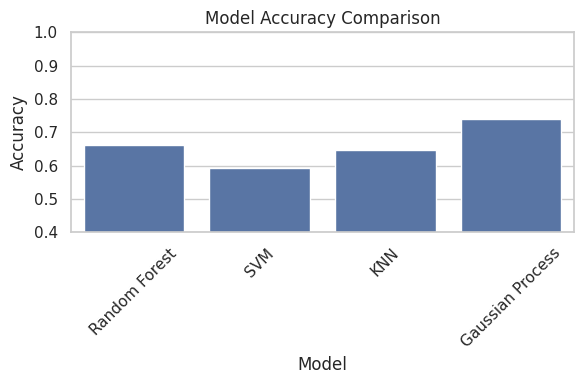

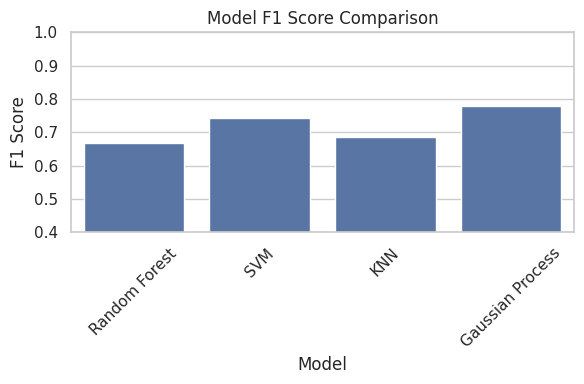

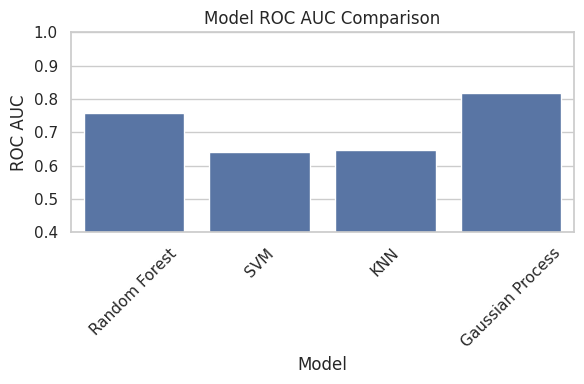

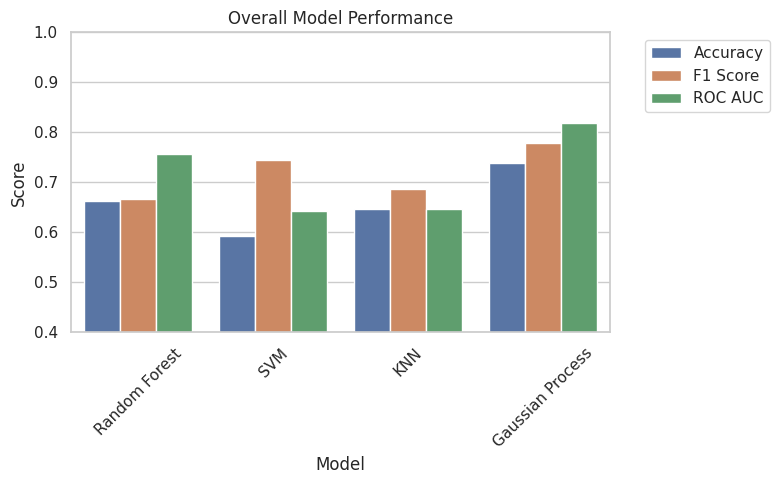

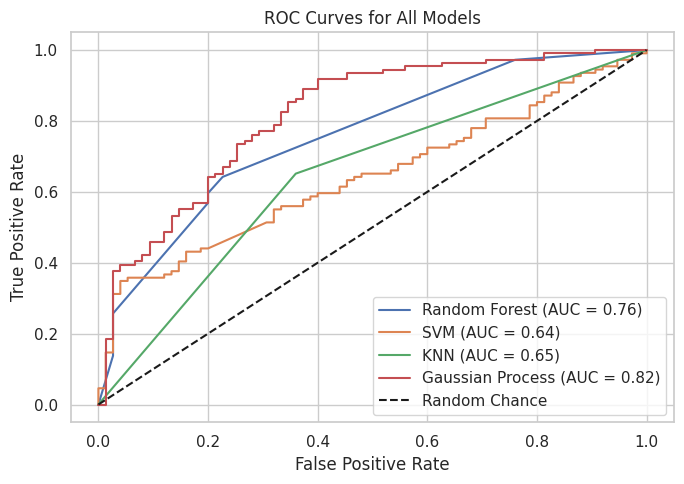

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")  # Update path if needed

# Drop irrelevant columns
df = df.drop(columns=["id", "dataset"])

# Convert 'num' to binary target
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Drop empty rows if any
df = df.dropna(how="all")

# Features and labels
X = df.drop("target", axis=1)
y = df["target"]

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Skip scaling (keeps models from performing optimally)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# Models with conservative configurations
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=3,
        max_depth=1,
        max_features=1,
        random_state=42
    ),
    "SVM": SVC(
        kernel="poly",
        degree=2,
        C=0.01,
        probability=True,
        random_state=42
    ),
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Gaussian Process": GaussianProcessClassifier(
        kernel=RBF(length_scale=50.0) + WhiteKernel(noise_level=2.0),
        optimizer=None,
        random_state=42
    )
}

# Evaluation results storage
results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "ROC AUC": []
}
roc_curves = {}

# Train, evaluate, and visualize
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1 Score"].append(f1)
    results["ROC AUC"].append(roc)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set seaborn style
sns.set(style="whitegrid")

# Accuracy Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0.4, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F1 Score Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="F1 Score", data=results_df)
plt.title("Model F1 Score Comparison")
plt.ylim(0.4, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ROC AUC Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="ROC AUC", data=results_df)
plt.title("Model ROC AUC Comparison")
plt.ylim(0.4, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Combined Metric Plot
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(8, 5))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")
plt.title("Overall Model Performance")
plt.ylim(0.4, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ROC Curve Plot
plt.figure(figsize=(7, 5))
for name, (fpr, tpr) in roc_curves.items():
    auc_val = results_df[results_df["Model"] == name]["ROC AUC"].values[0]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.tight_layout()
plt.show()
